In [2]:
import numpy as np
import pandas as pd
import os
import math
import networkx as nx

from matplotlib import pyplot as plt
import matplotlib.style as style

In [3]:
data_dir = "/Users/lixinhui/Dropbox (MIT)/17 Fall/A-6.419/Pset4/CAVIAR_Phases"
filename_sample = "phase2.csv"
input_path = os.path.join(data_dir, '')
sample_data = pd.read_csv(input_path + filename_sample, header = 0, index_col= 0)
count_row = sample_data.shape[0]
count_col = sample_data.shape[1]
#print(count_row)
#print(count_col)
print(sample_data.index.values.tolist())

[1, 89, 83, 3, 5, 88, 85, 90, 86, 2, 7, 6, 64, 8, 55, 10, 56, 97, 47, 98, 76, 9, 11, 12]


In [4]:
under_investigate = [1,3,83,86,85,6,11,88,106,89,84,5,8,76,77,87,82,96,12,17,80,33,16]
print(len(under_investigate))

23


In [5]:
n = 110
phases = 11
graphs = {}
for p in range(1, phases+1):
    file_name = "phase" + str(p) + ".csv"
    data = pd.read_csv(input_path + file_name, header = 0, index_col= 0)
    data_subj = data.index.values.tolist()
    #print(data_subj)
    M = np.zeros(shape = (111, 111))
    for i in data_subj:
        for j in data_subj:
            M[i,j] = data[str(j)][i]
    G = nx.DiGraph(M)
    G.remove_node(0)
    graphs[p] = G

In [6]:
############ 4.2(a) - degree #################
in_degree_df = pd.DataFrame(index = under_investigate)
for p in range(1, phases+1):
    in_degrees = graphs[p].in_degree(nbunch = under_investigate)
    in_degree_df[str(p)] = pd.Series(in_degrees)
#print(in_degree_df.to_latex())

In [7]:
out_degree_df = pd.DataFrame(index = under_investigate)
for p in range(1, phases+1):
    out_degrees = graphs[p].out_degree(nbunch = under_investigate)
    out_degree_df[str(p)] = pd.Series(out_degrees)
#print(out_degree_df.to_latex())

In [8]:
############ 4.2(a) - betweenness centrality #################
bc_df = pd.DataFrame(index = under_investigate)
for p in range(1, phases+1):
    bcs = nx.betweenness_centrality(graphs[p])
    bc_df[str(p)] = pd.Series(bcs)
print(bc_df)

            1         2         3         4         5         6         7  \
1    0.005989  0.014866  0.028174  0.036145  0.029392  0.024875  0.032195   
3    0.000000  0.000000  0.004318  0.005437  0.007263  0.006909  0.002421   
83   0.000000  0.000000  0.001798  0.005479  0.001529  0.000000  0.000000   
86   0.000000  0.000000  0.000849  0.002223  0.000000  0.000000  0.000000   
85   0.000127  0.000000  0.000000  0.007277  0.003313  0.000127  0.002591   
6    0.000042  0.000000  0.002421  0.000000  0.000000  0.000000  0.000000   
11   0.000000  0.000000  0.000042  0.000000  0.000000  0.000000  0.001444   
88   0.001317  0.001911  0.000000  0.000000  0.000000  0.000000  0.000000   
106  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
89   0.001529  0.001402  0.000000  0.006966  0.000000  0.000000  0.000000   
84   0.000000  0.000000  0.000028  0.001034  0.000000  0.000000  0.000000   
5    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

In [9]:
############ 4.2(a) - eigenvector centrality #################
ec_r_df = pd.DataFrame(index = under_investigate)
for p in range(1, phases+1):
    ecs_r = nx.eigenvector_centrality(graphs[p] ,max_iter=10000)
    ec_r_df[str(p)] = pd.Series(ecs_r)
#print(ec_r_df)

In [10]:
reverse_graphs = {}
ec_l_df = pd.DataFrame(index = under_investigate)
for p in range(1, phases+1):
    reverse_graphs[p] = graphs[p].reverse()
    ecs_l = nx.eigenvector_centrality(reverse_graphs[p] ,max_iter=10000)
    ec_l_df[str(p)] = pd.Series(ecs_l)
#print(ec_l_df)

In [11]:
############ 4.2(b) #################
#out_degree_df.mean(1).sort_values(ascending = False)
#print(bc_df.mean(1).sort_values(ascending = False))
#print(ec_r_df.mean(1).sort_values(ascending = False))
#ec_l_df.mean(1).sort_values(ascending = False)
sum_ec = ec_r_df + ec_l_df
sum_ec.mean(1).sort_values(ascending = False)

1      0.954089
3      0.670124
85     0.324596
87     0.237871
11     0.204883
76     0.184387
12     0.179876
6      0.169597
83     0.154032
8      0.141669
82     0.140607
5      0.104926
88     0.098087
86     0.090100
16     0.081282
89     0.072661
77     0.052849
84     0.049298
17     0.037505
96     0.022958
106    0.001210
33     0.000096
80     0.000096
dtype: float64

In [12]:
cc_df = pd.DataFrame(index = under_investigate)
for p in range(1, phases+1):
    ccs = nx.closeness_centrality(graphs[p])
    cc_df[str(p)] = pd.Series(ccs)
#print(cc_df)
cc_df.mean(1).sort_values(ascending = False)

1      0.164938
3      0.113071
76     0.090430
85     0.089073
12     0.069806
11     0.069210
87     0.066906
6      0.065608
84     0.056753
83     0.048801
82     0.045199
88     0.044480
8      0.037561
86     0.034938
17     0.033734
16     0.023588
89     0.020862
96     0.019669
5      0.019305
77     0.017234
33     0.007416
80     0.007416
106    0.000000
dtype: float64

In [13]:
############ 4.2(c) #################
in_degree_df_all = pd.DataFrame(index = range(1, n+1))
out_degree_df_all = pd.DataFrame(index = range(1, n+1))
bc_df_all = pd.DataFrame(index = range(1, n+1))
left_ec_df_all = pd.DataFrame(index = range(1, n+1))
right_ec_df_all = pd.DataFrame(index = range(1, n+1))
for p in range(1, phases+1):
    in_degrees = graphs[p].in_degree()
    out_degrees = graphs[p].out_degree()
    bcs = nx.betweenness_centrality(graphs[p])
    ecs_r = nx.eigenvector_centrality(graphs[p] ,max_iter=10000)
    ecs_l = nx.eigenvector_centrality(reverse_graphs[p] ,max_iter=10000)
    in_degree_df_all[str(p)] = pd.Series(in_degrees)
    out_degree_df_all[str(p)] = pd.Series(out_degrees)
    bc_df_all[str(p)] = pd.Series(bcs)
    right_ec_df_all[str(p)] = pd.Series(ecs_r)
    left_ec_df_all[str(p)] = pd.Series(ecs_l)
highest_indegree = in_degree_df_all.mean(1).nlargest(10).index.values.tolist()
highest_bc = bc_df_all.mean(1).nlargest(10).index.values.tolist()
highest_right_ec = right_ec_df_all.mean(1).nlargest(10).index.values.tolist()
highest_left_ec = left_ec_df_all.mean(1).nlargest(10).index.values.tolist()

In [14]:
print(np.setdiff1d(highest_bc, under_investigate))
print(np.setdiff1d(highest_right_ec, under_investigate))

[14 37 41]
[9]


In [15]:
############ 4.2(d) #################
sizes = []
density = []
for p in range(1, phases+1):
    sizes.append(graphs[p].size(weight = 'weight'))
    density.append(nx.density(graphs[p]))

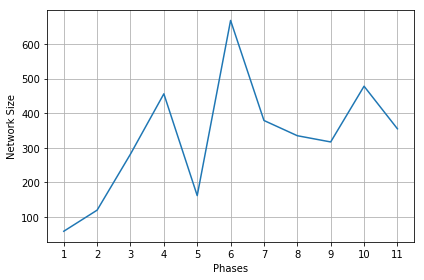

In [16]:
fig, ax = plt.subplots()
fig = plt.plot(range(1, phases+1), sizes)
ax.set(xlabel = "Phases", ylabel = "Network Size")
ax.set_xticks(range(1, phases+1))
ax.set_xticklabels(range(1, phases+1))
ax.grid()
plt.tight_layout()
#plt.savefig("2d1.png", dpi=150)
plt.show()

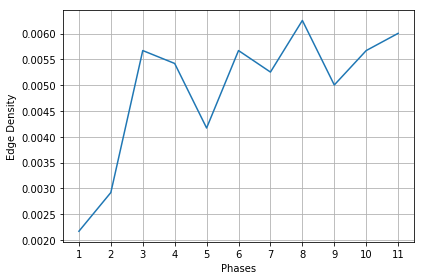

In [17]:
fig, ax = plt.subplots()
fig = plt.plot(range(1, phases+1), density)
ax.set(xlabel = "Phases", ylabel = "Edge Density")
ax.set_xticks(range(1, phases+1))
ax.set_xticklabels(range(1, phases+1))
ax.grid()
plt.tight_layout()
#plt.savefig("2d2.png", dpi=150)
plt.show()

In [18]:
############ 4.2(e) #################
central = [1, 3, 12, 85]
central_bc = bc_df.loc[central]
central_rec = ec_r_df.loc[central]

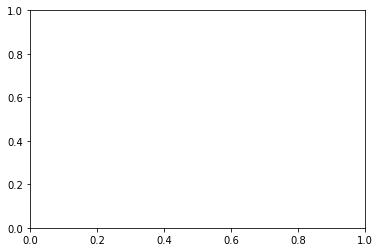

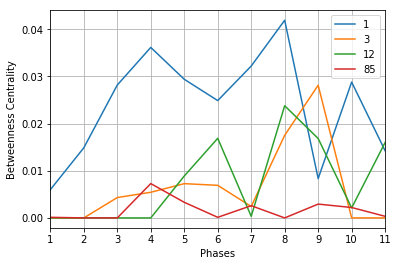

In [55]:
fig, ax = plt.subplots()
ax = central_bc.T.plot()
ax.grid()
ax.set(xlabel = "Phases", ylabel = "Betweenness Centrality")
ax.set_xticks(range(11))
ax.set_xticklabels(central_bc.columns)
#plt.savefig('2e_bc.png', dpi = 150)
plt.show()

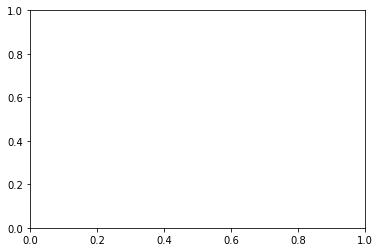

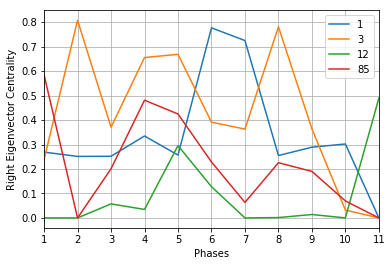

In [20]:
fig1, ax1 = plt.subplots()
ax1 = central_rec.T.plot()
ax1.grid()
ax1.set(xlabel = "Phases", ylabel = "Right Eigenvector Centrality")
ax1.set_xticks(range(11))
ax1.set_xticklabels(central_rec.columns)
#plt.savefig('2e_rec.png', dpi = 150)
plt.show()

In [44]:
############ 4.2(f) #################
in_degree = pd.Series(index = range(1, phases+1))
out_degree = pd.Series(index = range(1, phases+1))
degree = pd.Series(index = range(1, phases+1))
for p in range(1, phases+1):
    degree.loc[p] = graphs[p].degree(1)
    in_degree.loc[p] = in_degree_df.loc[1][str(p)]
    out_degree.loc[p] = out_degree_df.loc[1][str(p)]

In [49]:
n1 = pd.concat([in_degree.rename('in_degree'), out_degree.rename('out_degree'), degree.rename('degree')], axis = 1)

In [50]:
n1

,in_degree,out_degree,degree
1,5.0,11.0,16.0
2,8.0,17.0,25.0
3,10.0,26.0,36.0
4,11.0,21.0,32.0
5,11.0,18.0,29.0
6,17.0,13.0,30.0
7,15.0,18.0,33.0
8,10.0,19.0,29.0
9,5.0,9.0,14.0
10,8.0,13.0,21.0


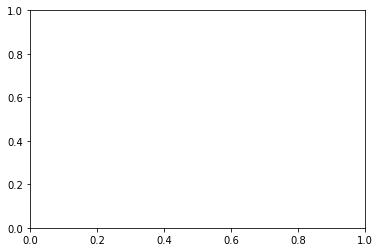

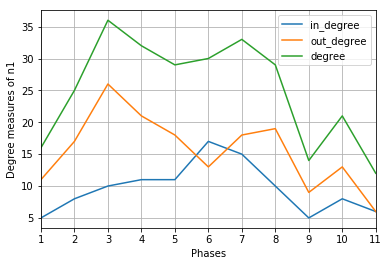

In [54]:
fig, ax = plt.subplots()
ax = n1.plot()
ax.grid()
ax.set(xlabel = "Phases", ylabel = "Degree measures of n1")
ax.set_xticks(range(1,12))
ax.set_xticklabels(central_bc.columns)
plt.savefig('2f.png', dpi = 150)
plt.show()